In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')


### Data Loading & Merging

In [31]:
linguist = pd.read_csv('./lingspam.csv')
enron = pd.read_csv('./enron_spam_data.csv')




In [32]:
enron = enron.rename(columns=str.lower)
enron = enron.rename(columns={"spam/ham": "label"})
enron['label'] = enron['label'].map({"ham": 0 , "spam": 1})



In [33]:
enron = enron.drop(['message id', 'date'], axis=1)

In [34]:
df = pd.concat([linguist, enron])
df = enron

In [35]:
df.shape

(33716, 3)

In [36]:
df.head(20)

,subject,message,label
0,christmas tree farm pictures,NaN,0
1,"vastar resources , inc .","gary , production from the high island larger ...",0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0
3,re : issue,fyi - see note below - already done .\nstella\...,0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0
6,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\...",0
7,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...,0
8,king ranch,there are two fields of gas that i am having d...,0
9,re : entex transistion,thanks so much for the memo . i would like to ...,0


In [37]:
df.describe()


,label
count,33716.000000
mean,0.509283
std,0.499921
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Data Cleaning (Removing Duplicated Values & Empty Values)

In [38]:
print(df.isna().sum()) #no messages or label field are empty
df['subject'] = df['subject'].fillna('')
df['message'] = df['message'].fillna('')
df.head(20)

subject    289
message    371
label        0
dtype: int64


,subject,message,label
0,christmas tree farm pictures,,0
1,"vastar resources , inc .","gary , production from the high island larger ...",0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0
3,re : issue,fyi - see note below - already done .\nstella\...,0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0
6,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\...",0
7,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...,0
8,king ranch,there are two fields of gas that i am having d...,0
9,re : entex transistion,thanks so much for the memo . i would like to ...,0


### Finding Number of Duplicate having same Subjects & Message

In [39]:
df.duplicated(subset=['subject', 'message']).sum()

np.int64(3222)

In [40]:
df.loc[df.duplicated(subset=['subject','message'])]

,subject,message,label
505,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0
1209,cornhusker - gas management,i thought it might be helpful to summarize the...,0
1228,re : cornhusker,"john ,\ni did some preliminary work on your qu...",0
1276,cleburne,"daren & john ,\nsee the attached document rega...",0
1292,calpine daily gas nomination,>\nricky a . archer\nfuel supply\n700 louisian...,0
...,...,...,...
33698,re [ 6 ] : letter about his warez,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1
33701,re [ 5 ] : question about our progs,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1
33705,reduzca sus gastos telefonicos,empresa lider mundial le permite utilizar su n...,1
33710,need your vics ?,"brand name meds such as vics , vals , xanies a...",1


In [41]:
df.query('subject == "submit 600"')

,subject,message,label


### Removing all duplicated values

In [42]:
df = df.loc[~df.duplicated(subset=['subject','message'])].reset_index(drop=True).copy()

In [43]:
df.shape

(30494, 3)

In [44]:
df.head(20)

,subject,message,label
0,christmas tree farm pictures,,0
1,"vastar resources , inc .","gary , production from the high island larger ...",0
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0
3,re : issue,fyi - see note below - already done .\nstella\...,0
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0
6,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\...",0
7,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...,0
8,king ranch,there are two fields of gas that i am having d...,0
9,re : entex transistion,thanks so much for the memo . i would like to ...,0


In [45]:
df.query('subject == "submit 600"')

,subject,message,label


### Counting Number of Spams & Hams

In [46]:
lc = df['label'].value_counts(normalize=True)  * 100
print(lc)
ham = lc.get(0)
spam = lc.get(1)
ratio = ham/spam
print(f"Ratio: {ratio:.2f}" )

label
0    52.174198
1    47.825802
Name: proportion, dtype: float64
Ratio: 1.09


### Feature Engineering

In [47]:
df['sub_chars'] = df['subject'].str.len()
df['sub_words'] = df['subject'].str.split().str.len()
df['message_words'] = df['message'].str.split().str.len()
df['message_chars'] = df['message'].str.len()

In [48]:
df.columns


Index(['subject', 'message', 'label', 'sub_chars', 'sub_words',
       'message_words', 'message_chars'],
      dtype='object')

In [49]:
df.head(20)

,subject,message,label,sub_chars,sub_words,message_words,message_chars
0,christmas tree farm pictures,,0,28,4,0,0
1,"vastar resources , inc .","gary , production from the high island larger ...",0,24,5,1572,4282
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,28,4,8,38
3,re : issue,fyi - see note below - already done .\nstella\...,0,10,3,344,1171
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,25,4,318,1124
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",0,24,6,119,534
6,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\...",0,21,5,90,411
7,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...,0,19,3,340,1375
8,king ranch,there are two fields of gas that i am having d...,0,10,2,328,1616
9,re : entex transistion,thanks so much for the memo . i would like to ...,0,22,4,640,3039


In [50]:
df.tail(20)

,subject,message,label,sub_chars,sub_words,message_words,message_chars
30474,pennystocks can make you money ; apwl - pk _ s...,hello gerstmar\napwl is a gold mine - it is at...,1,53,11,691,3682
30475,amazing stuff at great prices,"dear friend ,\nwhen did you spoil you computer...",1,29,5,89,427
30476,quicker effects . lesser costs . best bargain ...,innovative website . wide range of remedy sele...,1,52,10,207,995
30477,we have marked down the prices on all tablets ...,peruse our site and experience the advantages ...,1,67,14,171,871
30478,re [ 9 ] : letter about our progs,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,523,1803
30479,re [ 9 ] : letter about your soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,522,1780
30480,re [ 4 ] : talks about their soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,520,1770
30481,re [ 2 ] : question about our progs,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,35,9,520,1774
30482,re [ 2 ] : question about their soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,36,9,526,1823
30483,re [ 7 ] : talks about their soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,526,1871


In [51]:
import re
symbol_pattern = r'[!?,.:;@#$%^&*()]'
def count_symbols(text):
    return len(re.findall(symbol_pattern, text))

df['subject_symbols'] = df['subject'].apply(count_symbols)
df['message_symbols'] = df['message'].apply(count_symbols)

In [52]:
df.tail(20)

,subject,message,label,sub_chars,sub_words,message_words,message_chars,subject_symbols,message_symbols
30474,pennystocks can make you money ; apwl - pk _ s...,hello gerstmar\napwl is a gold mine - it is at...,1,53,11,691,3682,1,102
30475,amazing stuff at great prices,"dear friend ,\nwhen did you spoil you computer...",1,29,5,89,427,0,10
30476,quicker effects . lesser costs . best bargain ...,innovative website . wide range of remedy sele...,1,52,10,207,995,3,32
30477,we have marked down the prices on all tablets ...,peruse our site and experience the advantages ...,1,67,14,171,871,1,24
30478,re [ 9 ] : letter about our progs,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,523,1803,1,55
30479,re [ 9 ] : letter about your soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,522,1780,1,55
30480,re [ 4 ] : talks about their soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,520,1770,1,52
30481,re [ 2 ] : question about our progs,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,35,9,520,1774,1,54
30482,re [ 2 ] : question about their soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,36,9,526,1823,1,56
30483,re [ 7 ] : talks about their soft,mult\ngua\nmsof\nre !\nilan\ngeoe\ntwa\nnonee\...,1,33,9,526,1871,1,55


In [53]:
# df=df[df['message_chars'] <= 6000]
# df=df[df['sub_chars'] <= 300]
# df=df[df['subject_symbols'] <= 15]
# df=df[df['message_symbols'] <= 300]

## Visualization

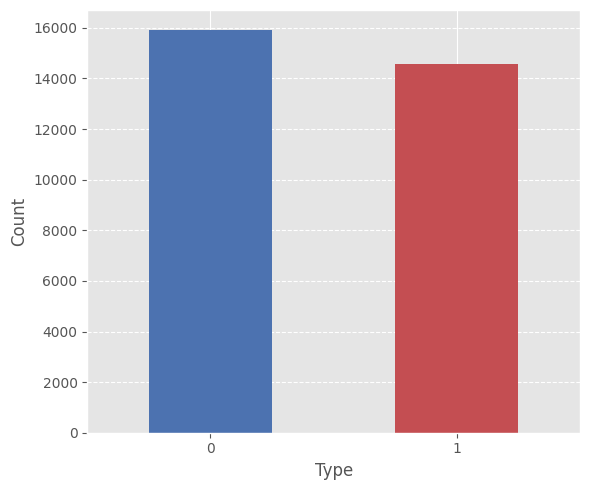

In [54]:
plt.figure(figsize=(6, 5))
df['label'].value_counts().plot(
    kind='bar',
    color=['#4C72B0', '#C44E52']
)
plt.ylabel('Count')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

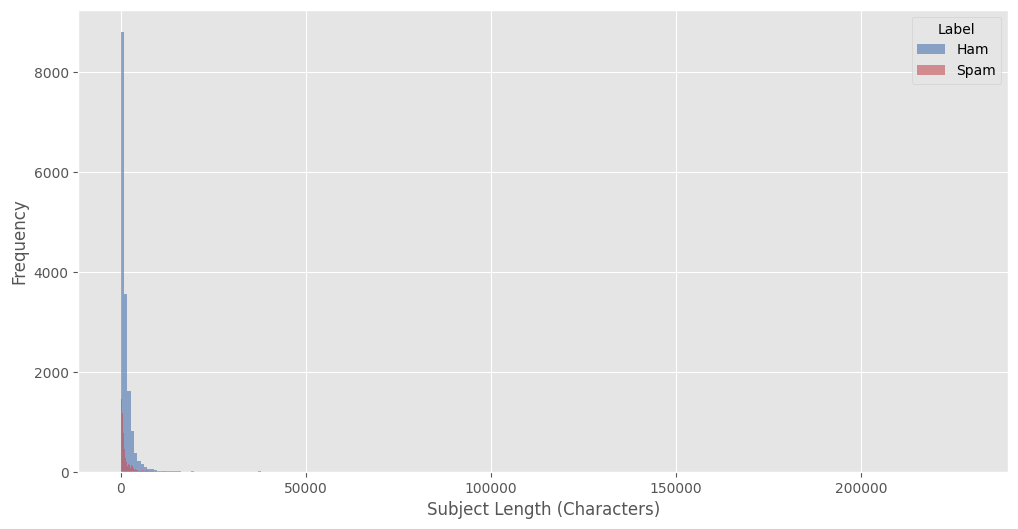

In [55]:
plt.figure(figsize=(12, 6))

ham_lengths = df[df['label'] == 0]['message_chars']
spam_lengths = df[df['label'] == 1]['message_chars']

plt.hist(
    ham_lengths,
    bins='auto',
    alpha=0.6,
    label='Ham',
    color='#4C72B0'
)
plt.hist(
    spam_lengths,
    bins='auto',
    alpha=0.6,
    label='Spam',
    color='#C44E52'
)

plt.xlabel('Subject Length (Characters)')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

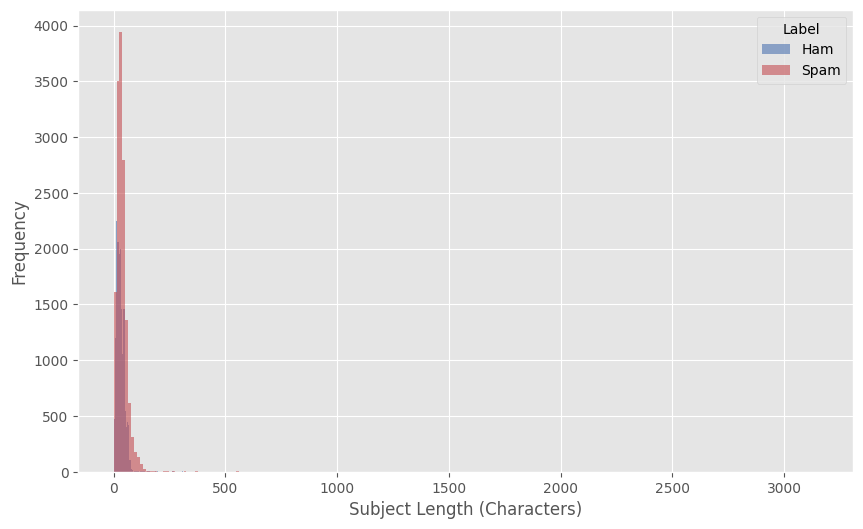

In [56]:
plt.figure(figsize=(10, 6))

ham_lengths = df[df['label'] == 0]['sub_chars']
spam_lengths = df[df['label'] == 1]['sub_chars']

plt.hist(
    ham_lengths,
    bins='auto',
    alpha=0.6,
    label='Ham',
    color='#4C72B0'
)
plt.hist(
    spam_lengths,
    bins='auto',
    alpha=0.6,
    label='Spam',
    color='#C44E52'
)

plt.xlabel('Subject Length (Characters)')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

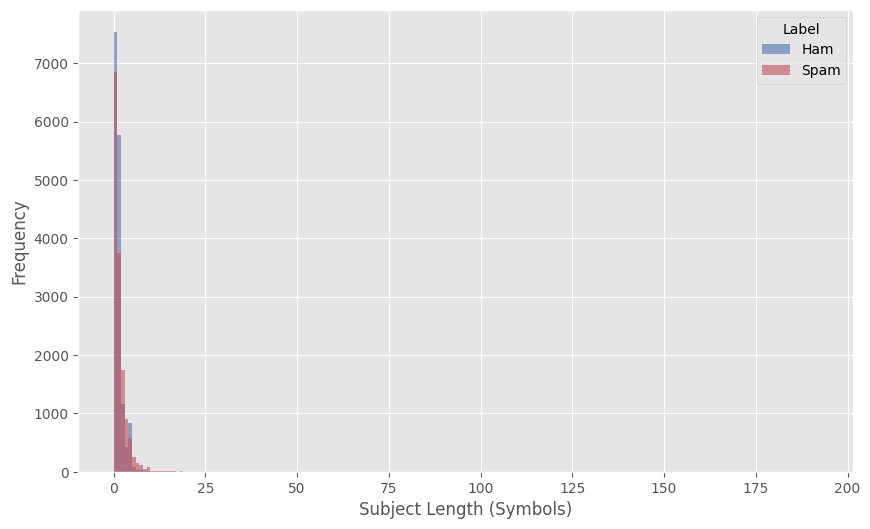

In [57]:
plt.figure(figsize=(10, 6))

ham_lengths = df[df['label'] == 0]['subject_symbols']
spam_lengths = df[df['label'] == 1]['subject_symbols']

plt.hist(
    ham_lengths,
    bins='auto',
    alpha=0.6,
    label='Ham',
    color='#4C72B0'
)
plt.hist(
    spam_lengths,
    bins='auto',
    alpha=0.6,
    label='Spam',
    color='#C44E52'
)

plt.xlabel('Subject Length (Symbols)')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

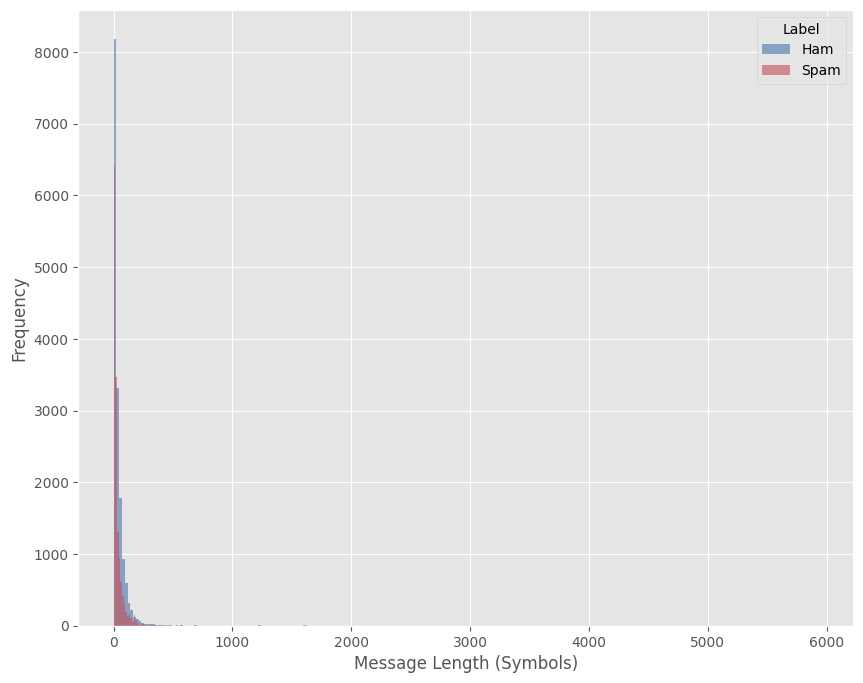

In [58]:
plt.figure(figsize=(10, 8))

ham_lengths = df[df['label'] == 0]['message_symbols']
spam_lengths = df[df['label'] == 1]['message_symbols']

plt.hist(
    ham_lengths,
    bins='auto',
    alpha=0.6,
    label='Ham',
    color='#4C72B0'
)
plt.hist(
    spam_lengths,
    bins='auto',
    alpha=0.6,
    label='Spam',
    color='#C44E52'
)

plt.xlabel('Message Length (Symbols)')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()